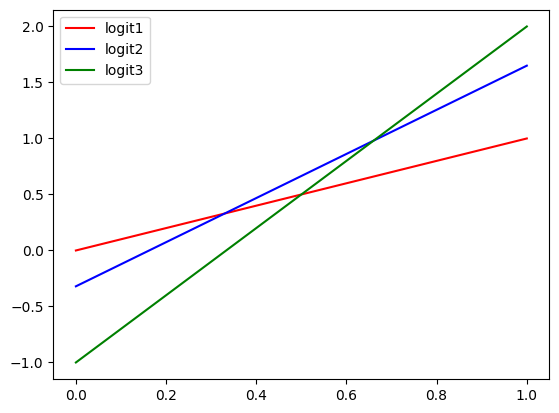

In [2]:
# Implement soft-binning example

import numpy as np
import matplotlib.pyplot as plt
import torch

w = np.array([1, 2, 3])
b = np.array([0, -0.33, -0.33-0.66])


x = np.linspace(0, 1, 100)

logit1 = x 
logit2 = 1.97*x - 0.32 
logit3 = -1 + 3*x

plt.plot(x, logit1, label='logit1', color='red')
plt.plot(x, logit2, label='logit2', color="blue")
plt.plot(x, logit3, label='logit3', color="green")
plt.legend()
plt.show()



In [3]:
x_torch = torch.from_numpy(x).float().reshape(-1, 1)

In [4]:
b_torch = torch.from_numpy(b).float()

In [5]:
w_torch = torch.from_numpy(w).float()

In [6]:
def torch_bin(x, cut_points, temperature=0.1):
    # x is a N-by-1 matrix (column vector)
    # cut_points is a D-dim vector (D is the number of cut-points)
    # this function produces a N-by-(D+1) matrix, each row has only one element being one and the rest are all zeros
    D = cut_points.shape[0]
    W = torch.reshape(torch.linspace(1.0, D + 1.0, D + 1), [1, -1]) # [1, 2, 3, ..., D+1]
    cut_points, _ = torch.sort(cut_points)  # make sure cut_points is monotonically increasing
    b = torch.cumsum(torch.cat([torch.zeros([1]), -cut_points], 0),0) # [0, -beta1, -beta1-beta2,...]
    h = (torch.matmul(x, W) + b)
    # res = torch.exp(h-torch.max(h))  
    # res = res/torch.sum(res, dim=-1, keepdim=True) # softmax
    res = torch.softmax(h/temperature, dim=-1)
    return res

In [7]:
x_torch

tensor([[0.0000],
        [0.0101],
        [0.0202],
        [0.0303],
        [0.0404],
        [0.0505],
        [0.0606],
        [0.0707],
        [0.0808],
        [0.0909],
        [0.1010],
        [0.1111],
        [0.1212],
        [0.1313],
        [0.1414],
        [0.1515],
        [0.1616],
        [0.1717],
        [0.1818],
        [0.1919],
        [0.2020],
        [0.2121],
        [0.2222],
        [0.2323],
        [0.2424],
        [0.2525],
        [0.2626],
        [0.2727],
        [0.2828],
        [0.2929],
        [0.3030],
        [0.3131],
        [0.3232],
        [0.3333],
        [0.3434],
        [0.3535],
        [0.3636],
        [0.3737],
        [0.3838],
        [0.3939],
        [0.4040],
        [0.4141],
        [0.4242],
        [0.4343],
        [0.4444],
        [0.4545],
        [0.4646],
        [0.4747],
        [0.4848],
        [0.4949],
        [0.5051],
        [0.5152],
        [0.5253],
        [0.5354],
        [0.5455],
        [0

In [8]:
cut_points = torch.from_numpy(np.array([0.33, 0.66]))
res_1 = torch_bin(x_torch, cut_points ,temperature=1)
res_2 = torch_bin(x_torch, cut_points ,temperature=0.1)
res_3 = torch_bin(x_torch, cut_points ,temperature=0.01)


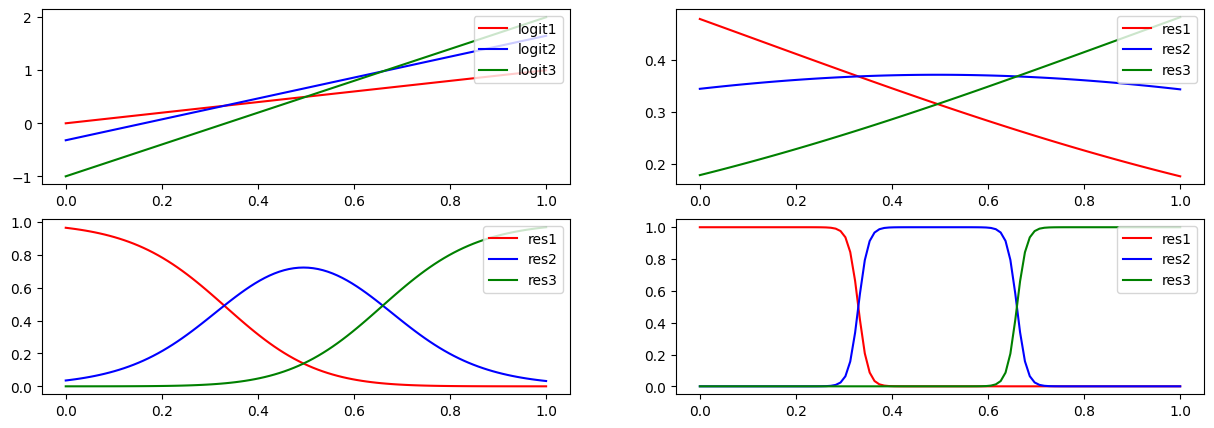

In [10]:
# Plot res1, res2, res3 as subplots
plt.figure(figsize=(15, 5))
plt.subplot(2, 2, 1)
plt.plot(x, logit1, label='logit1', color='red')
plt.plot(x, logit2, label='logit2', color="blue")
plt.plot(x, logit3, label='logit3', color="green")
plt.legend(loc="upper right")
plt.subplot(2, 2, 2)
plt.plot(x, res_1[:, 0].numpy(), label='res1', color='red')
plt.plot(x, res_1[:, 1].numpy(), label='res2', color="blue")
plt.plot(x, res_1[:, 2].numpy(), label='res3', color="green")
plt.legend(loc="upper right")
plt.subplot(2, 2, 3)
plt.plot(x, res_2[:, 0].numpy(), label='res1', color='red')
plt.plot(x, res_2[:, 1].numpy(), label='res2', color="blue")
plt.plot(x, res_2[:, 2].numpy(), label='res3', color="green")
plt.legend(loc="upper right")
plt.subplot(2, 2, 4)
plt.plot(x, res_3[:, 0].numpy(), label='res1', color='red')
plt.plot(x, res_3[:, 1].numpy(), label='res2', color="blue")
plt.plot(x, res_3[:, 2].numpy(), label='res3', color="green")
plt.legend(loc="upper right")
plt.show()
